In [1]:
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt

In [2]:
df_colesterol = pd.read_csv('./datasets/colesterol.csv')

In [3]:
# drop column id

df_colesterol.drop('Id', axis=1, inplace=True)

In [4]:
df_colesterol.columns = ['grupo_sanguineo', 'fumante', 'nivel_atividade_fisica', 'idade', 'peso', 'altura', 'nivel_colesterol']

df_colesterol.head()

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [5]:
df_colesterol_eda = df_colesterol.copy()
df_colesterol_bucketing = df_colesterol.copy()

### EDA

In [6]:
# Detecting absent values

df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [7]:
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [8]:
# Getting mode of categorical variables
# creating a dictionary

grupo_sanguineo_mode = df_colesterol['grupo_sanguineo'].mode()[0]
fumante_mode = df_colesterol['fumante'].mode()[0]
nivel_atividade_fisica_mode = df_colesterol['nivel_atividade_fisica'].mode()[0]

# Getting median from numerical variables

idade_median = df_colesterol['idade'].median()
peso_median = df_colesterol['peso'].median()
altura_median = df_colesterol['altura'].median()

# Create dictionary with these values

fillna_dict = {'idade': idade_median, 'peso': peso_median, 'altura': altura_median, 'grupo_sanguineo': grupo_sanguineo_mode, 'fumante': fumante_mode, 'nivel_atividade_fisica': nivel_atividade_fisica_mode}


# Changing null values

df_colesterol_eda.fillna(fillna_dict, inplace=True)

df_colesterol_eda.isna().sum()



grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [9]:
# Converting 'idade' and 'altura' from float to int

df_colesterol_eda['idade'] = df_colesterol_eda['idade'].astype(int)
df_colesterol_eda['altura'] = df_colesterol_eda['altura'].astype(int)

df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int32  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int32  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int32(2), object(3)
memory usage: 47.0+ KB


### OUTLIERS

<Axes: xlabel='peso'>

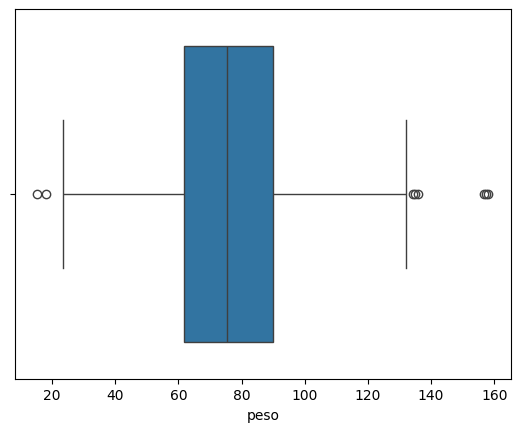

In [10]:
# Detecting ouliers
# Using boxplot from seaborn

sbs.boxplot(x='peso', data=df_colesterol_eda)


In [11]:
# Remove when 'peso' < 40
df_colesterol_eda = df_colesterol_eda[df_colesterol_eda['peso'] >= 40]

# Remove when 

### Análise Gráfica das Variáveis Categóricas

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

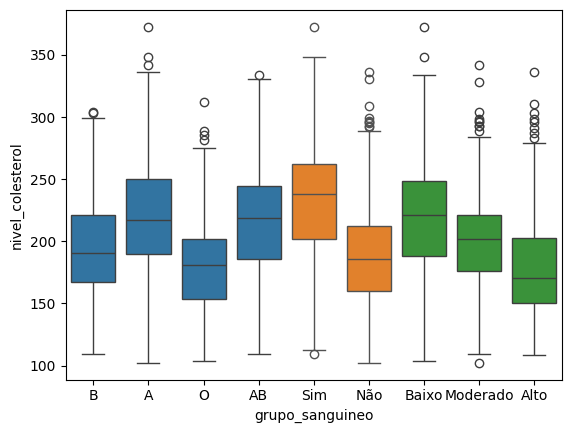

In [12]:
# Crossing categorical variables with 'nivel_colestero' using Seaborn

sbs.boxplot(x='grupo_sanguineo', y='nivel_colesterol', data=df_colesterol_eda)
sbs.boxplot(x='fumante', y='nivel_colesterol', data=df_colesterol_eda)
sbs.boxplot(x='nivel_atividade_fisica', y='nivel_colesterol', data=df_colesterol_eda)

### Análise Gráfica das Variáveis Numéricas

### Análise Gráfica Variáveis Numéirca

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

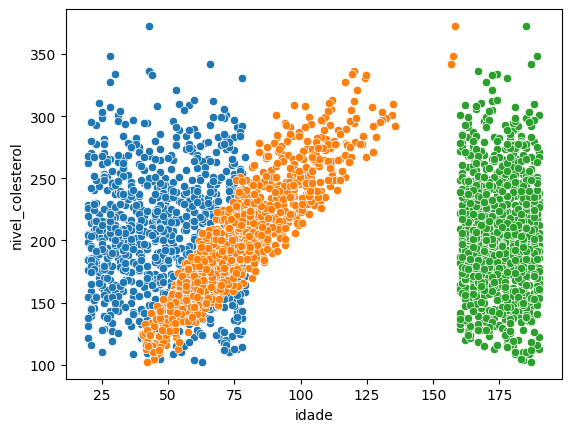

In [13]:
# Crossing numerical variables with 'nivel_colesterol'

sbs.scatterplot(x='idade', y='nivel_colesterol', data=df_colesterol_eda)
sbs.scatterplot(x='peso', y='nivel_colesterol', data=df_colesterol_eda)
sbs.scatterplot(x='altura', y='nivel_colesterol', data=df_colesterol_eda)


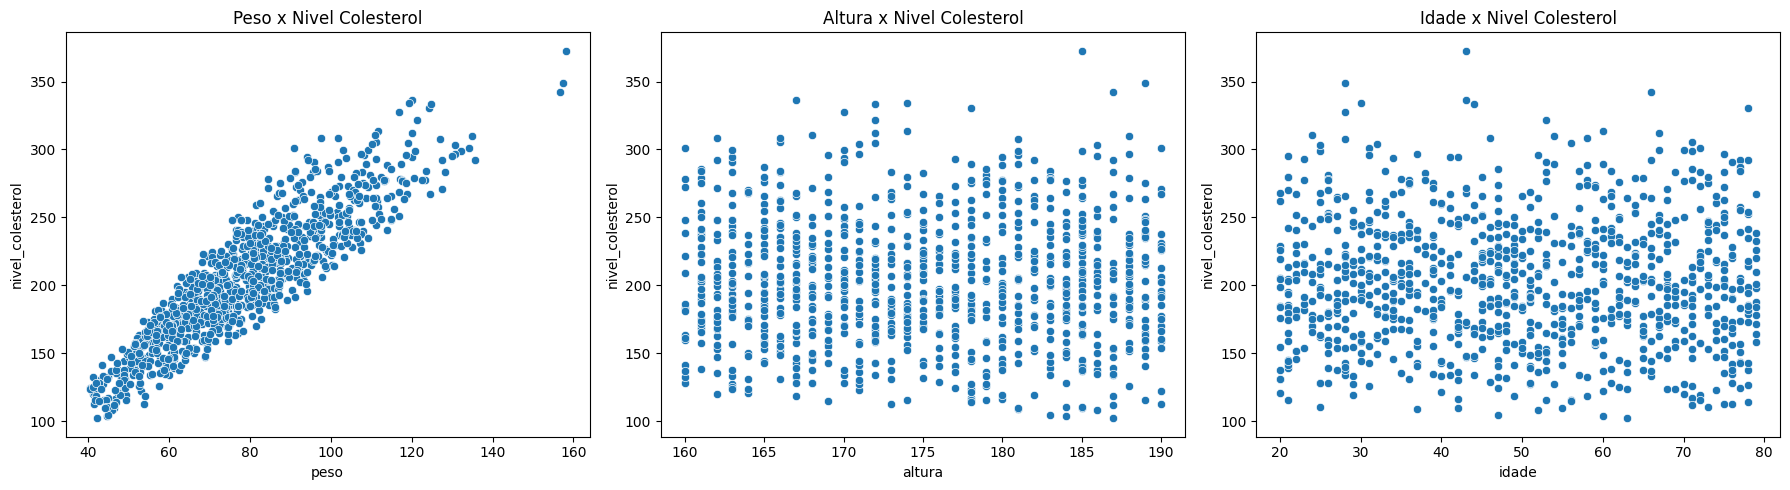

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot of 'peso' vs 'nivel_colesterol'
sbs.scatterplot(data=df_colesterol_eda, x='peso', y='nivel_colesterol', ax=axs[0])
axs[0].set_title('Peso x Nivel Colesterol')

# Scatter plot of 'altura' x 'nivel_colesterol'
sbs.scatterplot(data=df_colesterol_eda, x='altura', y='nivel_colesterol', ax=axs[1])
axs[1].set_title('Altura x Nivel Colesterol')

# Scatter plot of 'idade' x 'nivel_colesterol'
sbs.scatterplot(data=df_colesterol_eda, x='idade', y='nivel_colesterol', ax=axs[2])
axs[2].set_title('Idade x Nivel Colesterol')

plt.tight_layout()
plt.show()

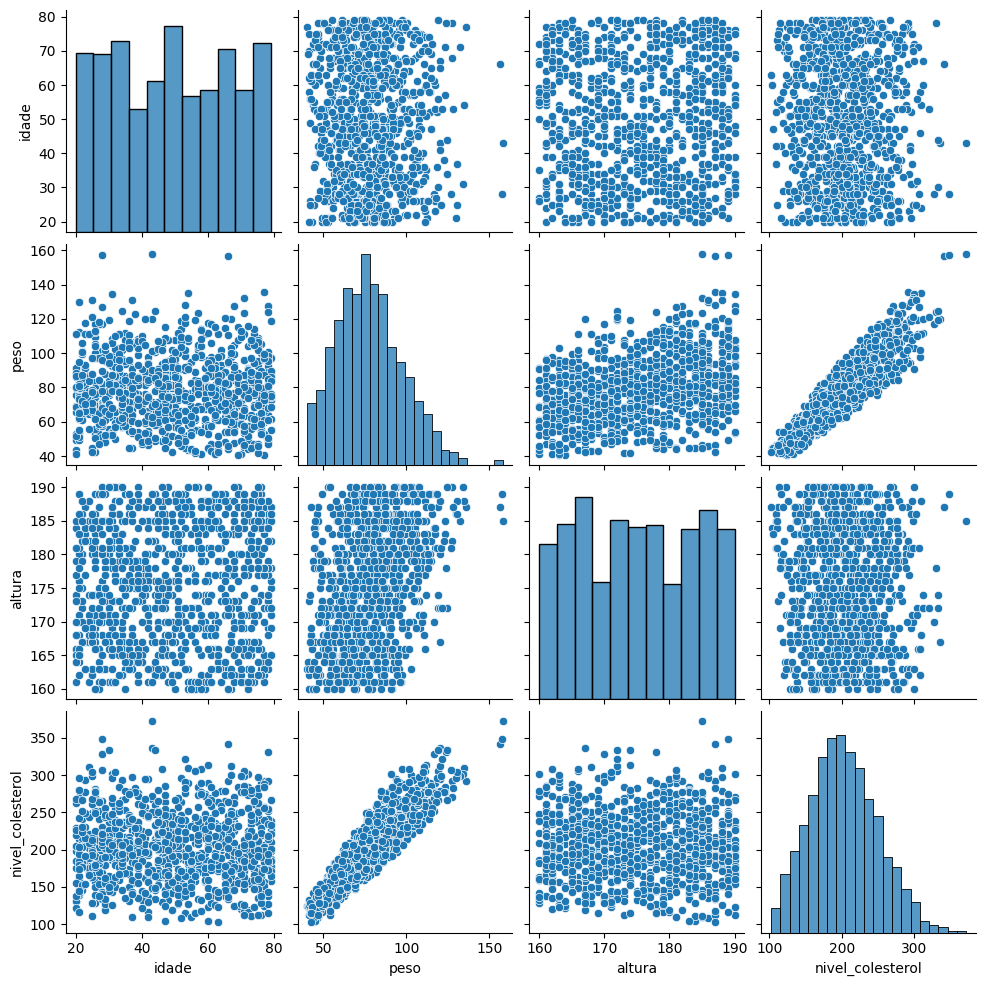

In [15]:
# Distribuition of numerical variables using only one pairplot

sbs.pairplot(data=df_colesterol_eda)
plt.show()

In [16]:
# Transforming categorical variables into numerical variables using One-Hot Encoder (Pandas)

df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')
# OPTION df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64', dropFirst=True)

df_colesterol_eda.head()

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0


In [17]:
# Converting categorical variable 'nivel_atividade_fisica' using factorize (Pandas)

# Define the desired order
order = ['Baixo', 'Moderado', 'Alto']
# Create a mapping from category to code
mapping = {category: i + 1 for i, category in enumerate(order)}

# Map the factorized values to the desired order
df_colesterol_eda['nivel_atividade_fisica_code'] = df_colesterol_eda['nivel_atividade_fisica'].map(mapping)

# Drop the categorical variable

df_colesterol_eda.drop('nivel_atividade_fisica', axis=1, inplace=True)

df_colesterol_eda.head()

,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim,nivel_atividade_fisica_code
0,33,85.1,186,199.63,0,0,1,0,0,1,1
1,68,105.0,184,236.98,1,0,0,0,1,0,2
2,25,64.8,180,161.79,0,0,0,1,1,0,3
3,43,120.2,167,336.24,1,0,0,0,1,0,3
4,79,88.5,175,226.23,0,1,0,0,1,0,1


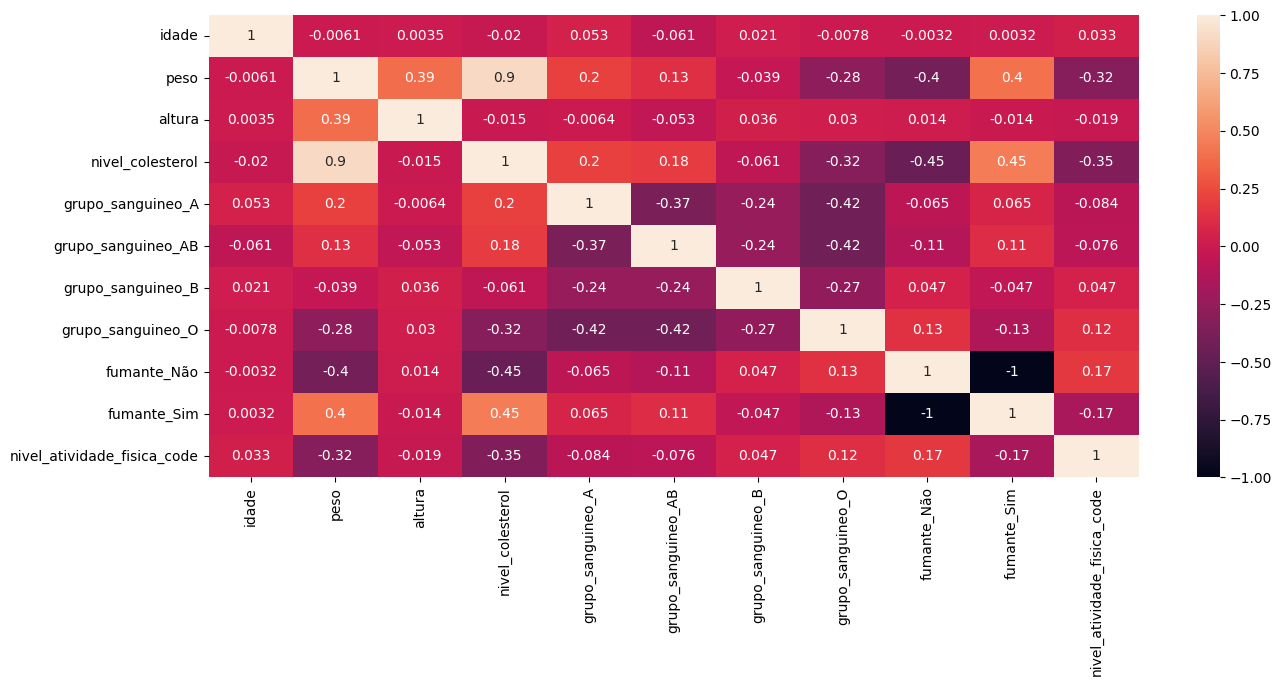

In [18]:
# Heatmap with correlations betweenvariables

plt.figure(figsize=(15,6))

sbs.heatmap(df_colesterol_eda.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

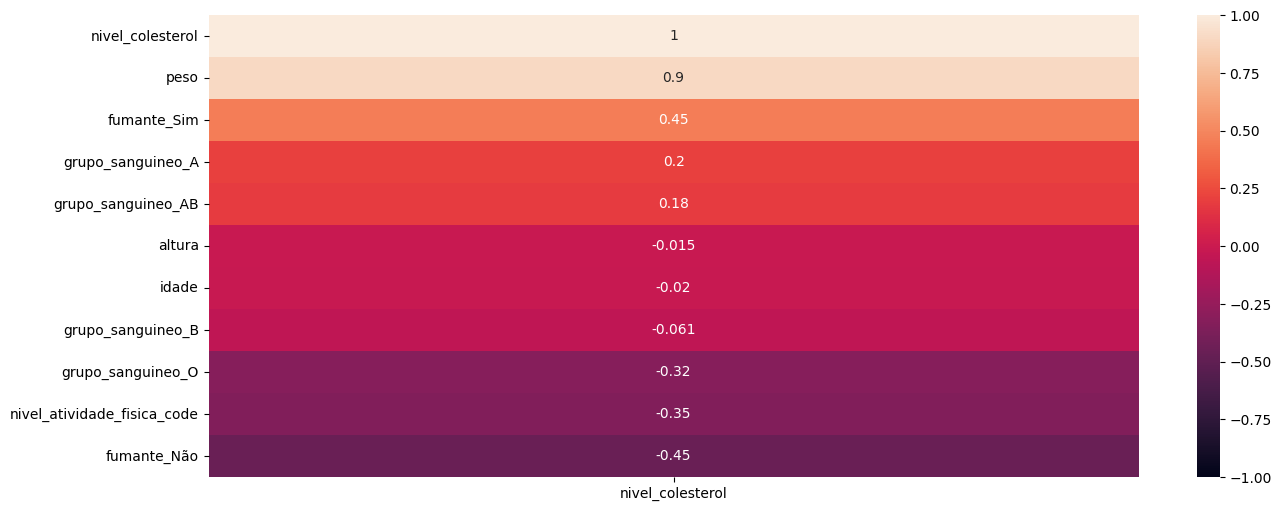

In [19]:
# Heatmap sorted showing only correlation with 'nivel_colesterol'

plt.figure(figsize=(15,6))

sbs.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol', ascending=False), vmin=-1, vmax=1, annot=True)
plt.show()



### BUCKETING
- Transforming numeric variables into categorical (groups)

In [20]:
# 'IDADE' 

bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

df_colesterol_bucketing['idade_bucket'] = pd.cut(x=df_colesterol_bucketing['idade'], bins=bins_idade, labels=labels_idade, include_lowest=True)

df_colesterol_bucketing.head()


,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,idade_bucket
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79


<Axes: xlabel='idade_bucket', ylabel='nivel_colesterol'>

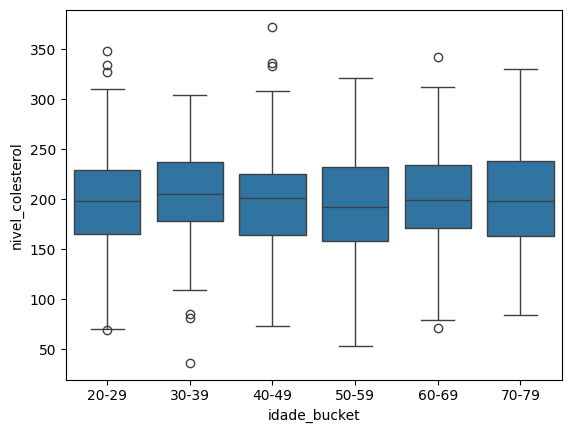

In [21]:
# boxplot 

sbs.boxplot(x='idade_bucket', y='nivel_colesterol', data=df_colesterol_bucketing)

In [22]:
# 'peso' 

bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']

df_colesterol_bucketing['peso_bucket'] = pd.cut(x=df_colesterol_bucketing['peso'], bins=bins_peso, labels=labels_peso, include_lowest=True)

df_colesterol_bucketing.head()

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,idade_bucket,peso_bucket
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39,80-89
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69,100-109
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29,60-69
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49,120-129
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79,80-89


<Axes: xlabel='peso_bucket', ylabel='nivel_colesterol'>

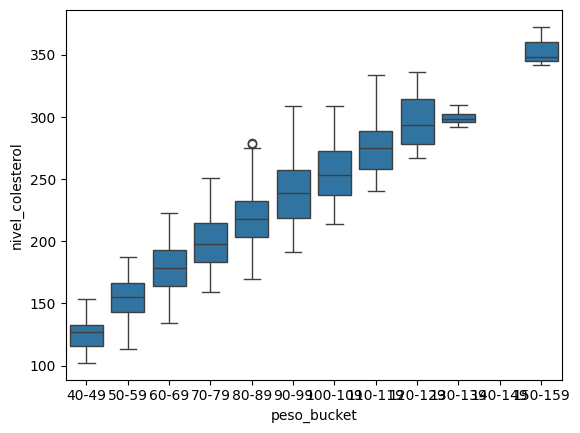

In [23]:
sbs.boxplot(x='peso_bucket', y='nivel_colesterol', data=df_colesterol_bucketing)

## PREPARAÇÃO PARA TREINAMENTO

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [25]:
# Remove when 'peso' < 40
df_colesterol = df_colesterol[df_colesterol['peso'] >= 40]

df_colesterol.info()    

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         957 non-null    object 
 1   fumante                 957 non-null    object 
 2   nivel_atividade_fisica  956 non-null    object 
 3   idade                   957 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  957 non-null    float64
 6   nivel_colesterol        960 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.0+ KB


In [26]:
# SPLIT

X = df_colesterol.drop(columns=['nivel_colesterol'], axis=1)
y = df_colesterol['nivel_colesterol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)


### PIPELINE

In [27]:
# Transforming features
# Impute mode into categorical features with null values
# Impute median into numerical features with null values
# OneHotEncoder with categorical features 'grupo_sanguineo' and 'fumanete'
# OrdinalEncoder with feature 'nivel_atividade_fisica' (Baixo - 1, Moderado - 2, Alto - 3)
# standardize numerical features

categorical_ordinal_features = ['nivel_atividade_fisica']
categorical_nominal_features = ['grupo_sanguineo', 'fumante'] 
numerical_features = ['idade', 'peso', 'altura']

categorical_ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))
])


categorical_nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



In [28]:
# Create preprocessor with all transformers

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_ordinal', categorical_ordinal_transformer, categorical_ordinal_features),
        ('cat_nominal', categorical_nominal_transformer, categorical_nominal_features),
        ('num', numerical_transformer, numerical_features)
    ]
)

### TRAINING THE MODEL

In [29]:
# Creating pipeline

model_multiple_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Training the model

model_multiple_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade_fisica']),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'peso',
                                                   'altura'])])),
                ('regressor', LinearRegression())])

## EVALUATING THE MODEL

In [30]:
# Prediction

y_pred = model_multiple_regression.predict(X_test)

In [31]:
# R2_score

r2_score(y_test, y_pred)

0.9621169127528096

In [32]:
# MAE
mean_absolute_error(y_test, y_pred)

7.318975694444443

In [33]:
# RMSE
root_mean_squared_error(y_test, y_pred)

9.247658257447005

### Reisuous Analysis

In [34]:
# Calculating residuals

residuals = y_test - y_pred

residuals.head()

229    -1.540
403    -9.445
578   -17.320
826     7.285
404     2.130
Name: nivel_colesterol, dtype: float64

In [35]:
# Standarize residuous
from scipy.stats import zscore

residuals_standarized = zscore(residuals)

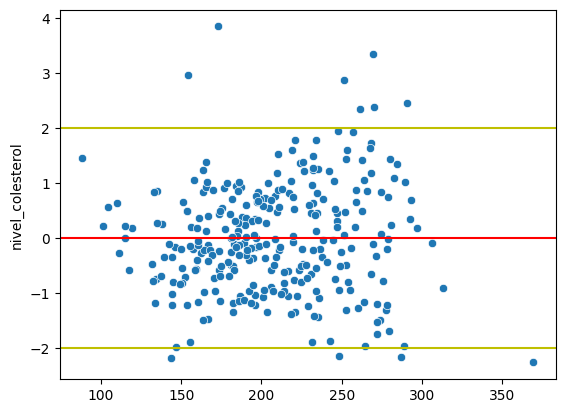

In [36]:
# Checking homoscedasticity 

sbs.scatterplot(x=y_pred, y=residuals_standarized)
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=-2, color='y', linestyle='-')
plt.axhline(y=+2, color='y', linestyle='-')
plt.show()

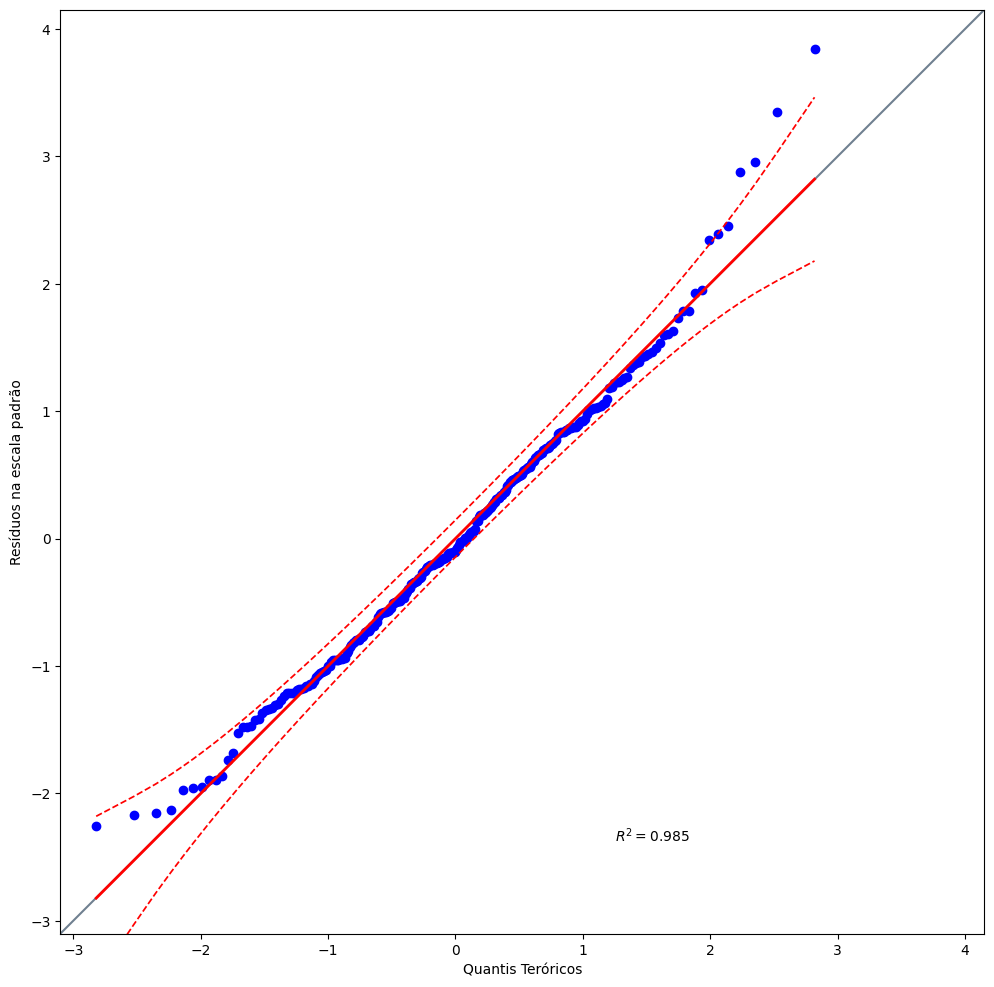

In [37]:
# Checking normality of the residuous

import pingouin as pg

plt.figure(figsize=(18,12))
pg.qqplot(residuals_standarized, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teróricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [38]:
# Normality Test - Shapiro Wilk 
# H0 - normal distribution
# p-value > 0.05 -> not reject

from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors

stat_shapiro, pvalue_shapiro = shapiro(residuals)

print(f'Estatística do Teste = {stat_shapiro:.4f} e P-Value = {pvalue_shapiro:.4f}')

Estatística do Teste = 0.9861 e P-Value = 0.0068


##### P-VALUE < 0,005 -> REJECT -> NOT NORMAL DISTRIBUTION

In [39]:
# Normality Test - Kolmogorov-Smirnov
# H0 - normal distribution
# p-value > 0.05 -> not reject

stat_ks, pvalue_ks = kstest(residuals, 'norm')



print(f'Estatística do Teste = {stat_ks:.4f} e P-Value = {pvalue_ks:.4f}')

Estatística do Teste = 0.3918 e P-Value = 0.0000


##### P-VALUE < 0,005 -> REJECT -> NOT NORMAL DISTRIBUTION

In [40]:
# Normality Test - Lillie Fors

stat_lf, pvalue_lf = lilliefors(residuals, dist='norm', pvalmethod='table')

print(f'Estatística do Teste = {stat_lf:.4f} e P-Value = {pvalue_lf:.4f}')

Estatística do Teste = 0.0425 e P-Value = 0.3045


##### P-VALUE > 0,005 -> ACCEPT ->  NORMAL DISTRIBUTION

In [41]:
# Normality Test - Anderson-Darling

stat_and, critica_and, significance_and = anderson(residuals, dist='norm')

print(f'Estatística do Teste = {stat_lf:.4f} e Critical Value = {critica_and[2]:.4f}')


Estatística do Teste = 0.0425 e Critical Value = 0.7760


#### Stat < Critcal Value -> NORMAL DISTRIBUTION

In [42]:
# Homoscedasticity test - Goldfeld-Quandt

from statsmodels.stats.diagnostic import het_goldfeldquandt

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

X_test_transformed = pipe.fit_transform(X_test)


stat_goldfeldt, p_value_goldfeldt,_ = het_goldfeldquandt(residuals, X_test_transformed)

print(f'Estatística do Teste = {stat_goldfeldt:.4f} e P-value = {p_value_goldfeldt:.4f}')

Estatística do Teste = 0.7192 e P-value = 0.9718


#### P-Value > 0,05 -> NOT REJECT -> There's Homoscedasticity

## Making predictions using the model



In [43]:
# Creating the input parameters using dictionary

input_parameters = {
    'grupo_sanguineo': 'O',
    'idade': 40,
    'peso': 70,
    'altura': 180,
    'fumante': 'Não',
    'nivel_atividade_fisica': 'Alto'
}

input_parameters_df = pd.DataFrame(input_parameters, index=[0])

input_parameters_df.head()

# Prediction

prediction = model_multiple_regression.predict(input_parameters_df)[0]

print(f'O nível de colesterol é de {prediction:.2f} mg/dL')

O nível de colesterol é de 165.50 mg/dL


## SAVING THE MODEL

In [44]:
# Saving the model using joblib library

import joblib

joblib.dump(model_multiple_regression,'model_colesterol_multiple_regression.pkl')

['model_colesterol_multiple_regression.pkl']